<h1>Final Project</h1>
<h2>Group 9: Angel Labrada-Galvan, Angela Gomez, Aubree Goff, Cynthia Mengqi Zhang, Garen Bainbridge, Hurley Haney, Layla Penland</h2>

**<h2>Question 2</h2>**

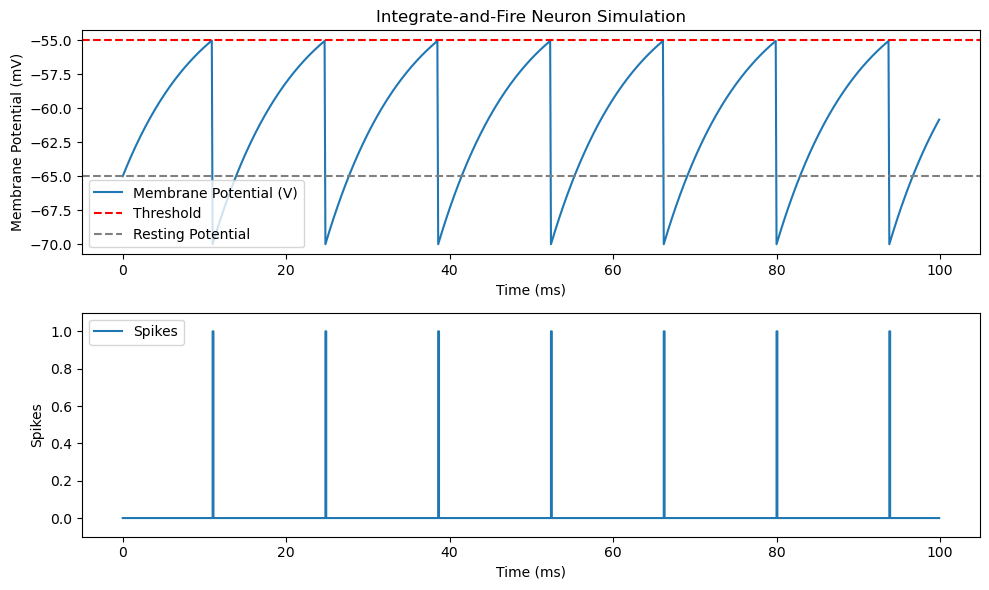

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1            # Time step (ms)
T = 100             # Total simulation time (ms)
time = np.arange(0, T, dt)
V_rest = -65        # Resting membrane potential (mV)
V_reset = -70       # Reset potential after spike (mV)
V_threshold = -55   # Firing threshold (mV)
R = 10              # Membrane resistance (MΩ)
tau_m = 10          # Membrane time constant (ms)
I_ext = 1.5         # External input current (nA)

# Variables
V = V_rest * np.ones_like(time)  # Membrane potential (initialized to V_rest)
spikes = np.zeros_like(time)    # Spike train (0 = no spike, 1 = spike)

# Simulation loop
for t in range(1, len(time)):
    # Compute membrane potential using Euler's method
    dV = (-(V[t-1] - V_rest) + R * I_ext) / tau_m * dt
    V[t] = V[t-1] + dV
    
    # Check for threshold crossing
    if V[t] >= V_threshold:
        V[t] = V_reset      # Reset potential after spike
        spikes[t] = 1       # Record spike

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V, label="Membrane Potential (V)")
plt.axhline(V_threshold, color='r', linestyle='--', label="Threshold")
plt.axhline(V_rest, color='gray', linestyle='--', label="Resting Potential")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.title("Integrate-and-Fire Neuron Simulation")

plt.subplot(2, 1, 2)
plt.plot(time, spikes, drawstyle='steps-post', label="Spikes")
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.tight_layout()
plt.show()



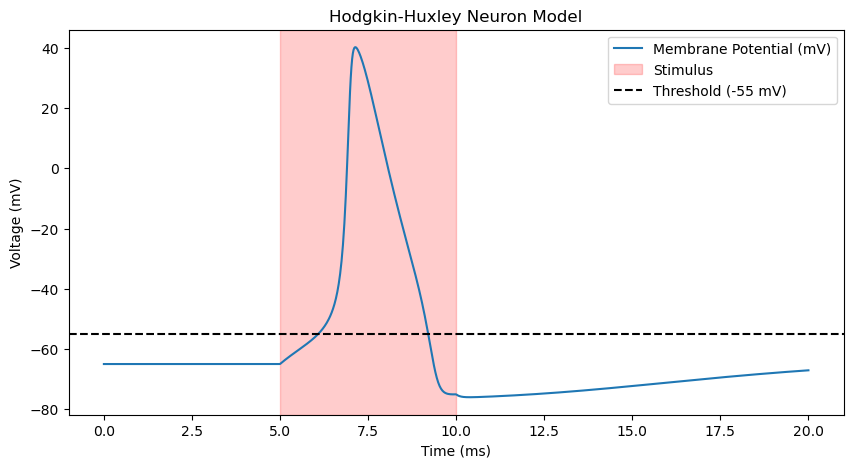

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley model parameters
Cm = 1.0  # Membrane capacitance, uF/cm^2
ENa = 50.0  # Sodium reversal potential, mV
EK = -77.0  # Potassium reversal potential, mV
EL = -54.387  # Leak reversal potential, mV
gNa = 120.0  # Maximum sodium conductance, mS/cm^2
gK = 36.0  # Maximum potassium conductance, mS/cm^2
gL = 0.3  # Leak conductance, mS/cm^2

# External current
def I_ext(t):
    return 10.0 if 5.0 <= t <= 10.0 else 0.0

# Gating variable steady-state functions and time constants
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))

# Hodgkin-Huxley differential equations
def hh_model(Y, t):
    V, n, m, h = Y
    
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)
    
    dVdt = (I_ext(t) - INa - IK - IL) / Cm
    
    return [dVdt, dndt, dmdt, dhdt]

# Initial conditions and time span
t = np.linspace(0, 20, 1000)
Y0 = [-65, 0.3177, 0.0529, 0.5961]  # Resting potential and gating variables

# Solve ODE
solution = odeint(hh_model, Y0, t)
V = solution[:, 0]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, V, label='Membrane Potential (mV)')
plt.axvspan(5, 10, color='red', alpha=0.2, label='Stimulus')
plt.axhline(-55, color='black', linestyle='--', label="Threshold (-55 mV)")  # Threshold marker
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Hodgkin-Huxley Neuron Model')
plt.legend()
plt.show()


Epoch 0, Loss: 0.6931
Epoch 500, Loss: 0.4562
Epoch 1000, Loss: 0.1392
Epoch 1500, Loss: 0.0920
Epoch 2000, Loss: 0.0744
Epoch 2500, Loss: 0.0647
Epoch 3000, Loss: 0.0583
Epoch 3500, Loss: 0.0536
Epoch 4000, Loss: 0.0499
Epoch 4500, Loss: 0.0470


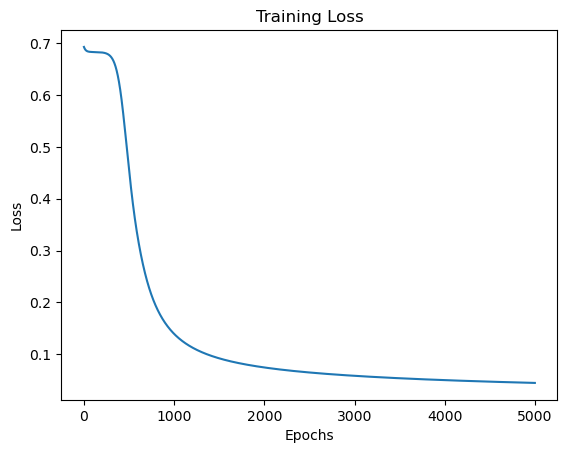

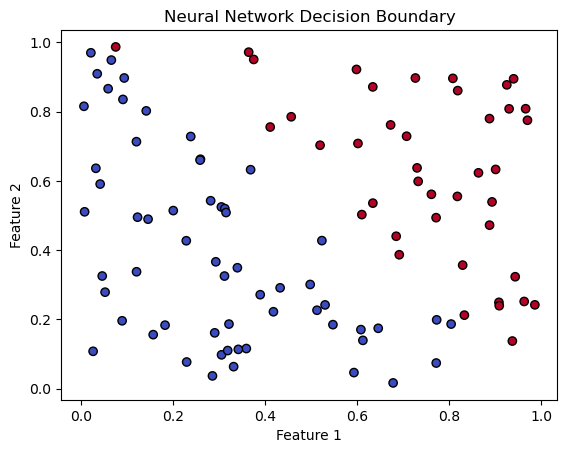

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (100 samples, 2 features)
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int).reshape(-1, 1)  # Ensure y is column vector

# Initialize weights and biases
input_size = 2
hidden_size = 3
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.01  # Small random values for stability
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Training the network (Fixed version)
learning_rate = 0.1  # Increase learning rate to speed up convergence
epochs = 5000
losses = []

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    y_pred = sigmoid(output_layer_input)

    # Compute loss (Binary Cross-Entropy)
    loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
    losses.append(loss)

    # Backpropagation
    d_output = (y_pred - y) / y.shape[0]  # Normalize gradients
    dW2 = np.dot(hidden_layer_output.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)
    
    d_hidden = np.dot(d_output, W2.T) * relu_derivative(hidden_layer_input)
    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Gradient descent step
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Make predictions
y_pred_final = sigmoid(np.dot(relu(np.dot(X, W1) + b1), W2) + b2)
predictions = (y_pred_final > 0.5).astype(int)

# Visualize classification results
plt.scatter(X[:, 0], X[:, 1], c=predictions.flatten(), cmap='coolwarm', edgecolors='k')
plt.title("Neural Network Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**<h2>Question 3</h2>**

**Descriptions of Models**
* The Integrate and Fire Model is a simple model for describing how neurons respond to stimuli. Membrane potential integrates incoming inputs/currents until it reaches threshold. It increases linearly and doesn’t decay over time. A limitation is that it doesn’t account for natural current leakage. It uses a single bit of information as its final output generator. 
* The Hodgkin-Huxley (HH) Model provides a more realistic and sophisticated interpretation of neuronal activity as it incorporates voltage-gated ion channels such as Na+ channels and K+ channels. An important limitation to note for the HH Model is it assumes all areas of a neuron's plasma membrane are equivalent with voltage-gated ion channels that all behave similarly. Not taking into account the variations that can arise with different areas of the membrane at different parts of the neuron can lead to bias in the output results
* An Open-Loop (feedforward) Model is a circuit that does not need feedback from the output, it functions with input alone. The input travels to the controller, which provides instructions for the actuator to produce the intended output. With this circuit, a benefit is that the system can respond efficiently if the instructions are accurate, and the instructions come from learned experience. However, a limitation of this system is that it does not work well for novel situations because there is no feedback from the output to adjust the weights. The code creates two figures: a training loss curve and a neural network decision boundary. As the network is a feedforward model, we should exhibit a gradual decrease in losses (or error) over time as the model is learning. And on the decision boundary it is showing a linear relationship where the blue dots are the instances in which the neural network produces a 0 and the red dots are the instances in which it produces a 1. 
* A bit, in relation to information theory, is a unit of information. It predicts uncertainty or surprise and represents a binary system where its possible states are 1 or 0. Bits are used to indicate the presence or absence of an action potential firing. For example, 1 bit is the amount of information required to discern between two equally likely outcomes. Shannon's entropy is the measure of uncertainty involved in the value of a random variable or process. It describes the different possible random outcomes, or states, in a system. The higher the entropy, the more complex or difficult the system is because of the high amount of uncertainty.
* The HH model contains more bits than the I&F model because it includes the complex ion channels as well as the continuous dynamics of the membrane potential. The I&F model only focuses on when spikes occur due to its binary nature, but the HH model includes inputs from the membrane, ion channels, and the electrical changes across the cell. However, the neural netwrok contains the most bits and entropy because compared to the HH model, it is inputting information. It takes in information from more than one neuron and then is feeding it through hidden layers to result in the output.


**<h2>Question 4</h2>**

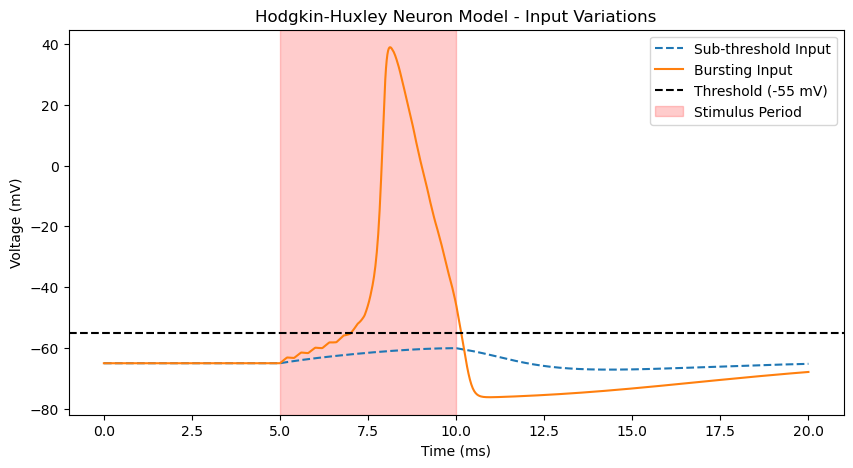

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley model parameters
Cm = 1.0  # Membrane capacitance, uF/cm^2
ENa = 50.0  # Sodium reversal potential, mV
EK = -77.0  # Potassium reversal potential, mV
EL = -54.387  # Leak reversal potential, mV
gNa = 120.0  # Maximum sodium conductance, mS/cm^2
gK = 36.0  # Maximum potassium conductance, mS/cm^2
gL = 0.3  # Leak conductance, mS/cm^2

# Different external current inputs
def I_ext_case1(t):  # Sub-threshold input (weaker)
    return 2.0 if 5.0 <= t <= 10.0 else 0.0  

def I_ext_case2(t):  # Bursting input (pulses)
    if 5.0 <= t <= 10.0:
        return 10.0 * (np.sin(5 * np.pi * (t - 5)) > 0)  # 5 Hz bursts
    return 0.0

# Gating variable steady-state functions and time constants
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))

# Hodgkin-Huxley differential equations
def hh_model(Y, t, I_ext):
    V, n, m, h = Y
    
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)
    
    dVdt = (I_ext(t) - INa - IK - IL) / Cm
    
    return [dVdt, dndt, dmdt, dhdt]

# Initial conditions and time span
t = np.linspace(0, 20, 1000)
Y0 = [-65, 0.3177, 0.0529, 0.5961]  # Resting potential and gating variables

# Solve ODE for both cases
solution_case1 = odeint(hh_model, Y0, t, args=(I_ext_case1,))
solution_case2 = odeint(hh_model, Y0, t, args=(I_ext_case2,))
V_case1 = solution_case1[:, 0]
V_case2 = solution_case2[:, 0]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, V_case1, label='Sub-threshold Input', linestyle='--')
plt.plot(t, V_case2, label='Bursting Input', linestyle='-')

plt.axhline(-55, color='black', linestyle='--', label="Threshold (-55 mV)")  # Threshold marker
plt.axvspan(5, 10, color='red', alpha=0.2, label='Stimulus Period')  # Stimulus region

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Hodgkin-Huxley Neuron Model - Input Variations')
plt.legend()
plt.show()


* "def I_ext_case2(t): # Bursting input (multiple small pulses) if 5.0 <= t <= 10.0: return 10.0 * (np.sin(5 * np.pi * (t - 5)) > 0) # 5 Hz bursts return 0.0" "def I_ext_case1(t): # Sub-threshold input return 2.0 if 5.0 <= t <= 10.0 else 0.0"
* These were the changes that were made to the code to make the graph follow the new inputs. For the bursting input, the code creates a bunch of small inputs of current which sum together to reach threshold, which is why on the plot there is an action potential. For the sub-threshold input, the function only allows for a current that doesn't reach threshold, which is why it begins to increase but then starts to decay instead of producing an action potential.


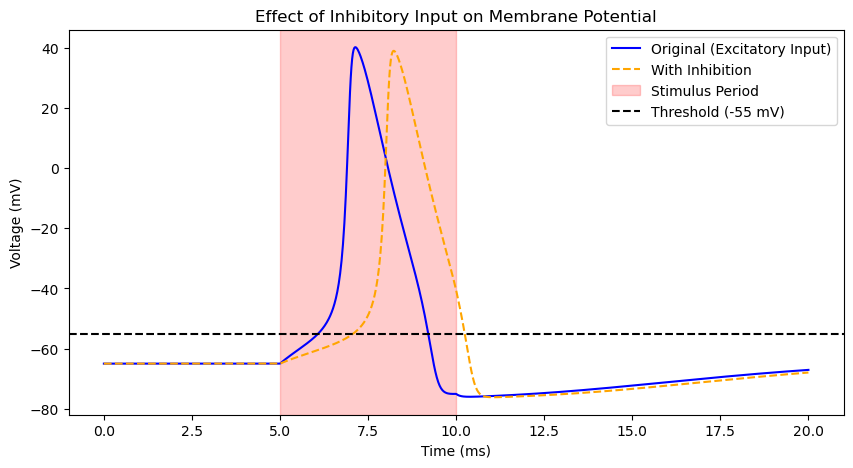

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley model parameters
Cm = 1.0  # Membrane capacitance, uF/cm^2
ENa = 50.0  # Sodium reversal potential, mV
EK = -77.0  # Potassium reversal potential, mV
EL = -54.387  # Leak reversal potential, mV
gNa = 120.0  # Maximum sodium conductance, mS/cm^2
gK = 36.0  # Maximum potassium conductance, mS/cm^2
gL = 0.3  # Leak conductance, mS/cm^2

# External current with and without inhibition
def I_ext(t, inhibitory=False):
    if 5.0 <= t <= 10.0:
        return 10.0 if not inhibitory else 10.0 - 5.0  # Apply inhibition
    return 0.0

# Gating variable steady-state functions and time constants
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))

# Hodgkin-Huxley differential equations
def hh_model(Y, t, inhibitory=False):
    V, n, m, h = Y
    
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)
    
    dVdt = (I_ext(t, inhibitory) - INa - IK - IL) / Cm
    
    return [dVdt, dndt, dmdt, dhdt]

# Initial conditions and time span
t = np.linspace(0, 20, 1000)
Y0 = [-65, 0.3177, 0.0529, 0.5961]  # Resting potential and gating variables

# Solve ODE for both cases
solution_original = odeint(hh_model, Y0, t, args=(False,))
solution_inhibited = odeint(hh_model, Y0, t, args=(True,))

V_original = solution_original[:, 0]
V_inhibited = solution_inhibited[:, 0]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, V_original, label='Original (Excitatory Input)', color='blue')
plt.plot(t, V_inhibited, label='With Inhibition', color='orange', linestyle='--')
plt.axvspan(5, 10, color='red', alpha=0.2, label='Stimulus Period')
plt.axhline(-55, color='black', linestyle='--', label="Threshold (-55 mV)")

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Effect of Inhibitory Input on Membrane Potential')
plt.legend()
plt.show()


* External current function with an optional inhibitory input
def I_ext(t, inhibitory=False):
    if 5.0 <= t <= 10.0:
        return 10.0 if not inhibitory else 10.0 - 5.0  # Apply inhibition
    return 0.0
      dVdt = (I_ext(t, inhibitory) - INa - IK - IL) / Cm  # Modified to include inhibition
* The blue curve represents the original model, where an excitatory stimulus (10 µA/cm²) is applied between 5 ms and 10 ms, and this stimulus causes the neuron to fire action potentials. The orange dashed curve represents the modified model, where an inhibitory input (subtracting 5 µA/cm²) is applied during the stimulus period. This reduces the net excitatory input to 5 µA/cm². This is why the model exhibits a delay in the second input as it takes more excitatory input to make up for the inhibition. 



**<h2>Question 6</h2>**

Coincidence detection for sound is a fundamental neural mechanism that enables precise auditory processing by detecting the timing of sound waves arriving at each ear. This process is critical for spatial hearing, speech perception, and auditory pattern recognition, allowing the brain to determine the direction and distance of a sound source. The brain accomplishes this by comparing signals from both ears using two main binaural cues: interaural time differences (ITDs), which are crucial for low-frequency sound localization, and interaural level differences (ILDs), which help localize high-frequency sounds. 

In mammals, ITD processing occurs in the medial superior olive (MSO), where excitatory signals from both ears converge onto specialized neurons that function as coincidence detectors, firing only when signals from each ear arrive simultaneously. This follows the Jeffress model, proposed in 1948, which suggests that ITD-sensitive neurons are systematically arranged along a delay-line system, where axonal conduction delays compensate for interaural differences, forming a topographic map of sound localization (Figure 1). In contrast, ILDs are processed in the lateral superior olive (LSO), where excitatory input from the ipsilateral ear is balanced against inhibitory glycinergic input from the contralateral ear via the medial nucleus of the trapezoid body (MNTB), allowing for intensity-based spatial resolution. 

While the Jeffress model holds in birds such as barn owls, whose nucleus laminaris acts as an MSO analog and provides microsecond-accurate sound localization, recent research suggests that mammals rely on a population coding strategy rather than a strict place code for ITDs. Coincidence detection also extends beyond spatial hearing, influencing speech processing by enabling neurons to phase-lock to rapid changes in sound waveforms, aiding in the perception of consonants and vowel formants. Disruptions in this system contribute to age-related hearing loss, auditory processing disorders (APD), and difficulties in speech-in-noise perception, often linked to synaptic degradation in brainstem auditory circuits. Advances in cochlear implants and hearing aids now aim to mimic natural ITD and ILD processing, restoring spatial hearing capabilities. Furthermore, research into the biophysical properties of coincidence detection, such as the role of NMDA receptors in enhancing temporal precision, is driving the development of neuromorphic auditory computing for artificial intelligence applications. 


![Jeffress, 1948](The-Jeffress-model-of-ITD-based-binaural-hearing-Jeffress-1948.png.jpeg)

(Jeffress, 1948). 

This is a visual of the Jeffress model. When a sound is heard, the ITDs travel across both the ipsi and contra delay lines, depending on the ear the sound entered. For the coincidence detectors to engage in maximal activation, signals from both the ipsi and contra delay lines must reach the coincidence detector at the same time. Assuming the source of a sound is directly in-front of someone, the third coincidence detector will be activated as the neural signal will travel through the ipsi delay line and the contra delay line at the same time. However, if the source of the sound is on either the left or right side, the travel time for the signal will not be equivalent for both delay lines, so coincidence detectors A or B can be activated or D or E. 
